In [1]:
import pandas as pd
import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def EmbeddingRec(char_embedding_size, chars_lenght, num_chars, word_embedding_size):
    poll_2_size = int(word_embedding_size / 2)
    poll_3_size = word_embedding_size - poll_2_size
    
    user_input = keras.Input(shape=(1, chars_lenght), name='user_id')
    # embedding
    emb_applied = layers.Embedding(input_dim=num_chars, output_dim=char_embedding_size, name='user_emb')(user_input)

    flatten = keras.layers.Flatten()(emb_applied)
    reshaped = layers.Reshape((chars_lenght, char_embedding_size, 1))(flatten)

    conv_1 = layers.Conv2D(poll_3_size, kernel_size=(3, char_embedding_size), activation="relu", name="conv_1")(reshaped)
    max_poll_1 = layers.MaxPooling2D(pool_size=(chars_lenght-2, 1), name="max_poll_1")(conv_1)

    conv_2 = layers.Conv2D(poll_2_size, kernel_size=(2, char_embedding_size), activation="relu", name="conv_2")(reshaped)
    max_poll_2 = layers.MaxPooling2D(pool_size=(chars_lenght-1, 1), name="max_poll_2")(conv_2)

    concat = layers.Concatenate()([max_poll_1, max_poll_2])

    new_flatten = layers.Flatten()(concat)
    word_embedding = layers.Dense(word_embedding_size, name="result_embedding")(new_flatten)
    # ========
    
    dense_1 = layers.Dense(8, activation='relu', name='FullyConnected-1')(word_embedding)
    
    dense_2 = layers.Dense(8, activation='relu', name='FullyConnected-2')(dense_1)

    result = layers.Dense(word_embedding_size, name='result')(dense_2)

    adam = keras.optimizers.Adam(lr=0.001)
    model = keras.Model(user_input, result)
    model.compile(optimizer=adam, loss="mse", metrics="mse")
    
    word_model = keras.Model(user_input, word_embedding)
    
    return model, word_model

In [38]:
model, word_model = EmbeddingRec(
    char_embedding_size=3,
    chars_lenght=3,
    num_chars=10,
    word_embedding_size=2
)

In [39]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 user_emb (Embedding)           (None, 1, 3, 3)      30          ['user_id[0][0]']                
                                                                                                  
 flatten_11 (Flatten)           (None, 9)            0           ['user_emb[0][0]']               
                                                                                                  
 reshape_4 (Reshape)            (None, 3, 3, 1)      0           ['flatten_11[0][0]']             
                                                                                            

In [40]:
np.array([[[2, 2, 1]], [[1, 2, 1]]]).shape

(2, 1, 3)

In [41]:
model.predict(np.array([[[2, 2, 1]], [[1, 2, 1]]])).shape

1/1 [==============================] - 0s 44ms/step


(2, 2)

In [42]:
model.predict(np.array([[[2, 2, 1]], [[1, 2, 1]]]))

1/1 [==============================] - 0s 7ms/step


array([[ 0.00043869, -0.00157327],
       [ 0.00077836, -0.00206788]], dtype=float32)

In [43]:
word_model.predict(np.array([[[2, 2, 1]], [[1, 2, 1]]])).shape

1/1 [==============================] - 0s 36ms/step


(2, 2)

In [44]:
word_model.predict(np.array([[[2, 2, 1]], [[1, 2, 1]]]))

1/1 [==============================] - 0s 13ms/step


array([[-0.00343467, -0.00094911],
       [ 0.00341911, -0.00418941]], dtype=float32)

In [45]:
word_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 user_emb (Embedding)           (None, 1, 3, 3)      30          ['user_id[0][0]']                
                                                                                                  
 flatten_11 (Flatten)           (None, 9)            0           ['user_emb[0][0]']               
                                                                                                  
 reshape_4 (Reshape)            (None, 3, 3, 1)      0           ['flatten_11[0][0]']             
                                                                                            

In [46]:
def int_to_vec(v):
    p = str(v)
#     if len(p) == 3:
#         z = [int(p[0]), int(p[1]), int(p[2])]
    if len(p) == 2:
        z = [0, int(p[0]), int(p[1])]
    if len(p) == 1:
        z = [0, 0, int(p[0])]
    return z

In [47]:
for epoch in range(180):
    X = []
    y = []
    for i in range(100):
        z = int_to_vec(i%100)
        X.append(z)
        z = int_to_vec((i+1)%100)
        y.append(z)
    y = np.array(y).reshape(len(y), 1, 3)
    y = word_model.predict(y)
    X = np.array(X).reshape(len(X), 1, 3)
    model.fit(X, y, epochs=1)
    print("epoch ", epoch)

4/4 [==============================] - 0s 1ms/step - loss: 1.1228e-04 - mse: 1.1228e-04
epoch  0
4/4 [==============================] - 0s 990us/step - loss: 6.4076e-05 - mse: 6.4076e-05
epoch  1
4/4 [==============================] - 0s 888us/step - loss: 3.4217e-05 - mse: 3.4217e-05
epoch  2
4/4 [==============================] - 0s 1ms/step - loss: 1.4436e-05 - mse: 1.4436e-05
epoch  3
4/4 [==============================] - 0s 907us/step - loss: 1.7017e-05 - mse: 1.7017e-05
epoch  4
4/4 [==============================] - 0s 967us/step - loss: 1.9753e-05 - mse: 1.9753e-05
epoch  5
4/4 [==============================] - 0s 994us/step - loss: 1.5894e-05 - mse: 1.5894e-05
epoch  6
4/4 [==============================] - 0s 1ms/step - loss: 1.4316e-05 - mse: 1.4316e-05
epoch  7
4/4 [==============================] - 0s 946us/step - loss: 1.4020e-05 - mse: 1.4020e-05
epoch  8
4/4 [==============================] - 0s 1ms/step - loss: 1.5108e-05 - mse: 1.5108e-05
epoch  9
4/4 [=============

4/4 [==============================] - 0s 945us/step - loss: 4.7273e-04 - mse: 4.7273e-04
epoch  53
4/4 [==============================] - 0s 954us/step - loss: 4.9998e-04 - mse: 4.9998e-04
epoch  54
4/4 [==============================] - 0s 1ms/step - loss: 5.2050e-04 - mse: 5.2050e-04
epoch  55
4/4 [==============================] - 0s 862us/step - loss: 5.9945e-04 - mse: 5.9945e-04
epoch  56
4/4 [==============================] - 0s 880us/step - loss: 5.9990e-04 - mse: 5.9990e-04
epoch  57
4/4 [==============================] - 0s 822us/step - loss: 5.9472e-04 - mse: 5.9472e-04
epoch  58
4/4 [==============================] - 0s 888us/step - loss: 6.3725e-04 - mse: 6.3725e-04
epoch  59
4/4 [==============================] - 0s 923us/step - loss: 6.7693e-04 - mse: 6.7693e-04
epoch  60
4/4 [==============================] - 0s 916us/step - loss: 7.9263e-04 - mse: 7.9263e-04
epoch  61
4/4 [==============================] - 0s 884us/step - loss: 8.6227e-04 - mse: 8.6227e-04
epoch  62
4/

4/4 [==============================] - 0s 860us/step - loss: 4.4744e-04 - mse: 4.4744e-04
epoch  107
4/4 [==============================] - 0s 1ms/step - loss: 4.4966e-04 - mse: 4.4966e-04
epoch  108
4/4 [==============================] - 0s 1ms/step - loss: 4.4131e-04 - mse: 4.4131e-04
epoch  109
4/4 [==============================] - 0s 948us/step - loss: 4.1958e-04 - mse: 4.1958e-04
epoch  110
4/4 [==============================] - 0s 1ms/step - loss: 4.1843e-04 - mse: 4.1843e-04
epoch  111
4/4 [==============================] - 0s 949us/step - loss: 4.2018e-04 - mse: 4.2018e-04
epoch  112
4/4 [==============================] - 0s 1ms/step - loss: 4.0996e-04 - mse: 4.0996e-04
epoch  113
4/4 [==============================] - 0s 878us/step - loss: 4.1620e-04 - mse: 4.1620e-04
epoch  114
4/4 [==============================] - 0s 932us/step - loss: 4.0809e-04 - mse: 4.0809e-04
epoch  115
4/4 [==============================] - 0s 1ms/step - loss: 4.0129e-04 - mse: 4.0129e-04
epoch  116


4/4 [==============================] - 0s 904us/step - loss: 2.4798e-04 - mse: 2.4798e-04
epoch  160
4/4 [==============================] - 0s 1ms/step - loss: 2.4304e-04 - mse: 2.4304e-04
epoch  161
4/4 [==============================] - 0s 798us/step - loss: 2.4760e-04 - mse: 2.4760e-04
epoch  162
4/4 [==============================] - 0s 795us/step - loss: 2.5292e-04 - mse: 2.5292e-04
epoch  163
4/4 [==============================] - 0s 752us/step - loss: 2.4569e-04 - mse: 2.4569e-04
epoch  164
4/4 [==============================] - 0s 800us/step - loss: 2.4852e-04 - mse: 2.4852e-04
epoch  165
4/4 [==============================] - 0s 816us/step - loss: 2.4947e-04 - mse: 2.4947e-04
epoch  166
4/4 [==============================] - 0s 968us/step - loss: 2.4953e-04 - mse: 2.4953e-04
epoch  167
4/4 [==============================] - 0s 819us/step - loss: 2.5175e-04 - mse: 2.5175e-04
epoch  168
4/4 [==============================] - 0s 806us/step - loss: 2.5151e-04 - mse: 2.5151e-04
epo

In [48]:
model.predict([0, 1, 6])

1/1 [==============================] - 0s 46ms/step


array([[ 0.1665723 , -0.12830558]], dtype=float32)

In [49]:
model.predict([0, 1, 7])

1/1 [==============================] - 0s 13ms/step


array([[ 0.16662276, -0.12835322]], dtype=float32)

In [50]:
word_model.predict([0, 1, 7])

1/1 [==============================] - 0s 38ms/step


array([[ 0.17220998, -0.13418281]], dtype=float32)

In [51]:
word_model.predict([0, 1, 8])

1/1 [==============================] - 0s 13ms/step


array([[ 0.17055783, -0.13266611]], dtype=float32)

In [52]:
word_model.predict([[4, 5, 5], [3, 4, 2], [3, 4, 3]])

1/1 [==============================] - 0s 12ms/step


array([[-0.04033618,  0.02905394],
       [ 0.05340432, -0.02511723],
       [ 0.05340432, -0.02511723]], dtype=float32)

1/1 [==============================] - 0s 13ms/step


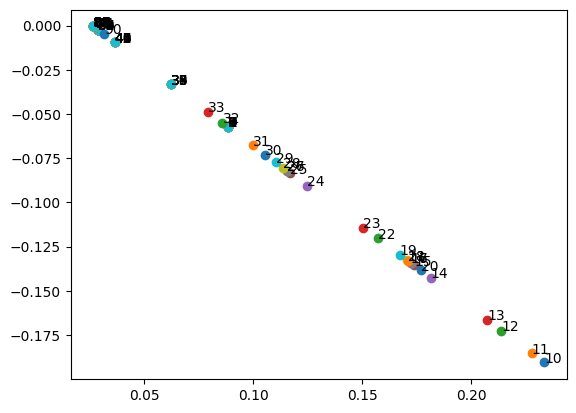

In [53]:
import random

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(100):
    pred = word_model.predict([int_to_vec(i)])
    ax.scatter(pred[:,0], pred[:,1])
    ax.annotate(i, pred[0])

In [54]:
for i in range(100):
    pred = word_model.predict([int_to_vec(i)])
    print(i, pred)

1/1 [==============================] - 0s 12ms/step
0 [[ 0.0885582  -0.05738908]]
1/1 [==============================] - 0s 12ms/step
1 [[ 0.0885582  -0.05738908]]
1/1 [==============================] - 0s 12ms/step
2 [[ 0.0885582  -0.05738908]]
1/1 [==============================] - 0s 13ms/step
3 [[ 0.0885582  -0.05738908]]
1/1 [==============================] - 0s 15ms/step
4 [[ 0.0885582  -0.05738908]]
1/1 [==============================] - 0s 14ms/step
5 [[ 0.0885582  -0.05738908]]
1/1 [==============================] - 0s 13ms/step
6 [[ 0.0885582  -0.05738908]]
1/1 [==============================] - 0s 13ms/step
7 [[ 0.0885582  -0.05738908]]
1/1 [==============================] - 0s 14ms/step
8 [[ 0.0885582  -0.05738908]]
1/1 [==============================] - 0s 13ms/step
9 [[ 0.0885582  -0.05738908]]
1/1 [==============================] - 0s 13ms/step
10 [[ 0.23354505 -0.19048943]]
1/1 [==============================] - 0s 12ms/step
11 [[ 0.22783968 -0.18525182]]
1/1 [=========

1/1 [==============================] - 0s 14ms/step
99 [[ 0.02662139 -0.00053005]]
